# Linear models, training

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Sep 15, 2024 13:13

# Preamble

## Quote of the Day

![](https://cdn.openai.com/reasoning-evals/v2/headline-desktop.png?w=3840&q=90&fm=webp)

[OpenAI](https://openai.com) released [o1](https://openai.com/o1/) on
September 12, 2024: “o1 greatly improves over GPT-4o on challenging
reasoning benchmarks. Solid bars show pass@1 accuracy and the shaded
region shows the performance of majority vote (consensus) with 64
samples.”

## Quote of the Day (continued)

**Videos**:

-   [**Building** OpenAI
    o1](https://youtu.be/3k89FMJhZ00?si=6dYNDz6J8M64-CoJ)
-   [**Coding** with OpenAI
    o1](https://youtu.be/50W4YeQdnSg?si=gn1r1yCkOW8tECbi)
-   [Scott Wu: OpenAI o1 &
    **Coding**](https://www.youtube.com/watch?v=wyuZzLfDhD8)
-   [Catherine Brownstein:
    **Genetics**](https://www.youtube.com/watch?v=5rFzKdAdpOg&list=PLOXw6I10VTv_T9QV-DKXhq7HFUQRkGQLI&index=4)
-   [Mario Krenn: **Quantum
    Physics**](https://www.youtube.com/watch?v=OJo-SlzlwtI&list=PLOXw6I10VTv_T9QV-DKXhq7HFUQRkGQLI&index=12)
-   [OpenAI o1
    **playlist**](https://www.youtube.com/playlist?list=PLOXw6I10VTv_T9QV-DKXhq7HFUQRkGQLI)

The videos in this playlist range from 1:17 minute to 3:17 minutes in
duration.

- understanding the data is key to understanding the problem
- replace missing data with values that make sense
- pick data set with at least 1000 values, so you don't need to start over analysis

## Training a Linear Model

In this lecture, we will cover the foundational concepts of linear
regression, and gradient descent.

You will gain a deeper understanding of these essential machine learning
techniques, enabling you to apply them effectively in your work.

### General Objective

-   **Explain** the process of training a linear model

## Learning Objectives

-   **Distinguish** between regression and classification tasks.
-   **Explain** the training process for linear regression models.
-   In your own words, **explain** the role of optimization algorithms
    in solving linear regression problems.
-   **Describe** the role of partial derivatives in the gradient descent
    algorithm.
-   **Compare** the **batch**, **stochastic**, and **mini-batch**
    gradient descent algorithms.

### Readings

-   Based on Géron (2019), $\S$ 4.

# Problem

## Supervised Learning - Regression

-   The **training data** is a collection of **labelled** examples.
    -   $\{(x_i,y_i)\}_{i=1}^N$
        -   Each $x_i$ is a **feature vector** with $D$ dimensions.
        -   $x_i^{(j)}$ is the value of the **feature** $j$ of the
            example $i$, for $j \in 1 \ldots D$ and $i \in 1 \ldots N$.
    -   The **label** $y_i$ is a **real number**.
-   **Problem**: Given the data set as input, create a **model** that
    can be used to predict the value of $y$ for an unseen $x$.

The concept of linear regression can be traced back to the early work of
Sir Francis Galton in the late 19th century. Galton introduced the idea
of “regression” in his 1886 paper, which focused on the relationship
between the heights of parents and their children. He observed that
children’s heights tended to regress towards the average, which led to
the term “regression.”

However, the mathematical formulation of linear regression is closely
associated with the work of Karl Pearson, who in the early 20th century
extended Galton’s ideas to create the method of least squares for
fitting a linear model. The method itself, though, was developed earlier
in 1805 by Adrien-Marie Legendre and independently by Carl Friedrich
Gauss for astronomical data analysis.

**See:** Stanton (2001).

K-nearest neighbours
- measure distance to all other points
- find k points that are closest to the new point
- nearest k points are setosa => new point is setosa
- gets tricky when neighbours are not all one class, use majority class out of the k neighbours
- can weight the decision by the distance
- not really a learning algo, just using the graph

## Rationale

**Linear regression** is introduced to conveniently present a well-known
training algorithm, **gradient descent**. Additionally, it serves as a
foundation for introducing **logistic regression**–a classification
algorithm—which further facilitates discussions on **artificial neural
networks**.

-   Linear Regression
    -   Gradient Descent
    -   Logistic Regression
        -   Neural Networks

The training algorithms for machine learning models can vary
significantly depending on the model (e.g., decision trees, SVMs, etc.).
In order to fit our schedule, we will concentrate on this specific
sequence.

## Supervised Learning - Regression

Can you think of examples of regression tasks?

. . .

1.  **House Price Prediction**:
    -   **Application**: Estimating the market value of residential
        properties based on features such as location, size, number of
        bedrooms, age, and amenities.
2.  **Stock Market Forecasting**:
    -   **Application**: Predicting future prices of stocks or indices
        based on historical data, financial indicators, and economic
        variables.
3.  **Weather Prediction**:
    -   **Application**: Estimating future temperatures, rainfall, and
        other weather conditions using historical weather data and
        atmospheric variables.
4.  **Sales Forecasting**:
    -   **Application**: Predicting future sales volumes for products or
        services by analyzing past sales data, market trends, and
        seasonal patterns.
5.  **Energy Consumption Prediction**:
    -   **Application**: Forecasting future energy usage for households,
        industries, or cities based on historical consumption data,
        weather conditions, and economic factors.
6.  **Medical Cost Estimation**:
    -   **Application**: Predicting healthcare costs for patients based
        on their medical history, demographic information, and treatment
        plans.
7.  **Traffic Flow Prediction**:
    -   **Application**: Estimating future traffic volumes and
        congestion levels on roads and highways using historical traffic
        data and real-time sensor inputs.
8.  **Customer Lifetime Value (CLV) Estimation**:
    -   **Application**: Predicting the total revenue a business can
        expect from a customer over the duration of their relationship,
        based on purchasing behavior and demographic data.
9.  **Economic Indicators Forecasting**:
    -   **Application**: Predicting key economic indicators such as GDP
        growth, unemployment rates, and inflation using historical
        economic data and market trends.
10. **Demand Forecasting**:
    -   **Application**: Estimating future demand for products or
        services in various industries like retail, manufacturing, and
        logistics to optimize inventory and supply chain management.
11. **Real Estate Valuation**:
    -   **Application**: Assessing the market value of commercial
        properties like office buildings, malls, and industrial spaces
        based on location, size, and market conditions.
12. **Insurance Risk Assessment**:
    -   **Application**: Predicting the risk associated with insuring
        individuals or properties, which helps in determining premium
        rates, based on historical claims data, and demographic factors.
13. **Ad Click-Through Rate (CTR) Prediction**:
    -   **Application**: Estimating the likelihood that a user will
        click on an online advertisement based on user behavior, ad
        characteristics, and contextual factors.
14. **Loan Default Prediction**:
    -   **Application**: Predicting the probability of a borrower
        defaulting on a loan based on credit history, income, loan
        amount, and other financial indicators.

## Supervised Learning - Regression

Focusing on applications possibly running on a mobile device.

. . .

1.  **Battery Life Prediction**:
    -   **Application**: Estimating remaining battery life based on
        usage patterns, running applications, and device settings.
2.  **Health and Fitness Tracking**:
    -   **Application**: Predicting calorie burn, heart rate, or sleep
        quality based on user activity, biometrics, and historical
        health data.
3.  **Personal Finance Management**:
    -   **Application**: Forecasting future expenses or savings based on
        spending habits, income patterns, and budget goals.
4.  **Weather Forecasting**:
    -   **Application**: Providing personalized weather forecasts based
        on current location and historical weather data.
5.  **Traffic and Commute Time Estimation**:
    -   **Application**: Predicting travel times and suggesting optimal
        routes based on historical traffic data, real-time conditions,
        and user behavior.
6.  **Image and Video Quality Enhancement**:
    -   **Application**: Adjusting image or video quality settings
        (e.g., brightness, contrast) based on lighting conditions and
        user preferences.
7.  **Fitness Goal Achievement**:
    -   **Application**: Estimating the time needed to achieve fitness
        goals such as weight loss or muscle gain based on user activity
        and dietary input.
8.  **Mobile Device Performance Optimization**:
    -   **Application**: Predicting the optimal settings for device
        performance and battery life based on usage patterns and app
        activity.

## Linear Regression

-   A **linear model** assumes that the value of the label, $\hat{y_i}$,
    can be expressed as a **linear combination** of the feature values,
    $x_i^{(j)}$: $$
    \hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$  
-   Here, $\theta_{j}$ is the $j$th parameter of the (linear) **model**,
    with $\theta_0$ being the **bias** term/parameter, and
    $\theta_1 \ldots \theta_D$ being the **feature weights**.
- weighted sum of the attributes

## Linear Regression (continued)

**Problem**: find values for all the model parameters so that the model
**“best fits”** the training data.

. . .

-   The **Root Mean Square Error** is a common performance measure for
    regression problems.

$$
    \sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
$$
h(x_i) is a prediction
play with the theta value until h(x_i) is as close as possible to y_i

## LinearRegression

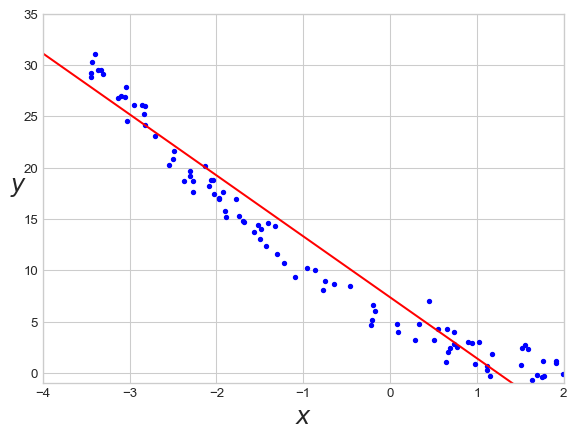

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

Herein, we examine a straightforward model involving a single variable.

## Source code

In [3]:
import numpy as np

X = 6 * np.random.rand(100, 1) - 4
y = X ** 2 - 4 * X + 5 + np.random.randn(100, 1) # not a linear equation!

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[-4], [2]])
y_pred = lin_reg.predict(X_new)

- introducing biases by choosing models
- in general we don't know how data is generated

This slide contains an anomaly. Can you identify it?

The data have been generated from a quadratic model, $x^2 - 4x + 5$,
with Gaussian noise added to make the synthetic data more realistic.

This example illustrates that, in practice, we often have limited
knowledge about the underlying model that generated the data.

Despite this uncertainty, we make assumptions—in this case, assuming
linearity—when building our models.

Later, we will refer to this as **bias** (distinct from the bias
parameter in our regression model). Both bias and variance influence the
performance of our models.

## GPT 4o interactions (2024-09-14)

**User**: Explain the code on the previous slide line by line.

. . .

**AI**: Certainly! Here is a line-by-line explanation of the provided
code:

In [4]:
import numpy as np

-   **Explanation**: This line imports the NumPy library, which is a
    fundamental package for numerical computations in Python. It is
    commonly used for working with arrays and matrices, as well as for
    performing a variety of mathematical operations.

In [5]:
X = 6 * np.random.rand(100, 1) - 4

-   **Explanation**: This line generates a NumPy array `X` containing
    100 rows and 1 column of random numbers. The
    `np.random.rand(100, 1)` function generates uniformly distributed
    random numbers between 0 and 1. Multiplying by 6 scales these
    numbers to the range \[0, 6), and subtracting 4 shifts the range to
    \[-4, 2).

In [6]:
y = X ** 2 - 4 * X + 5 + np.random.randn(100, 1)

-   **Explanation**: This line generates the target variable `y` based
    on a quadratic equation with some added noise. Specifically:
    -   `X ** 2` computes the square of each element in `X`.
    -   `- 4 * X` subtracts four times each element in `X`.
    -   `+ 5` adds a constant term of 5.
    -   `+ np.random.randn(100, 1)` adds Gaussian noise with a mean of 0
        and standard deviation of 1 to each element, making the data
        more realistic by introducing some randomness.

In [7]:
from sklearn.linear_model import LinearRegression

-   **Explanation**: This line imports the `LinearRegression` class from
    the `sklearn.linear_model` module, which is part of the Scikit-Learn
    library. Scikit-Learn is widely used for machine learning in Python.

In [8]:
lin_reg = LinearRegression()

-   **Explanation**: This line creates an instance of the
    `LinearRegression` class and assigns it to the variable `lin_reg`.
    This object will be used to fit the linear regression model to the
    data.

In [9]:
lin_reg.fit(X, y)

-   **Explanation**: This line fits the linear regression model to the
    data by finding the best-fitting line through the points `(X, y)`.
    The `fit` method trains the model using the provided features `X`
    and target variable `y`.

In [10]:
X_new = np.array([[-4], [2]])

-   **Explanation**: This line creates a new NumPy array `X_new` with
    two values: -4 and 2. These values represent new data points for
    which we want to predict the target variable using the trained
    model.

In [11]:
y_pred = lin_reg.predict(X_new)

-   **Explanation**: This line uses the trained linear regression model
    to predict the target variable `y_pred` for the new data points in
    `X_new`. The `predict` method returns the predicted values based on
    the fitted model.

In summary, this script generates synthetic data, fits a linear
regression model to it, and then uses the model to make predictions on
new data points.

## Source code (continued)

In [12]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Source code (continued)

In [13]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-4, 2, -1, 35])
save_fig("regression_linear-01")
plt.show()

## Andrew Ng

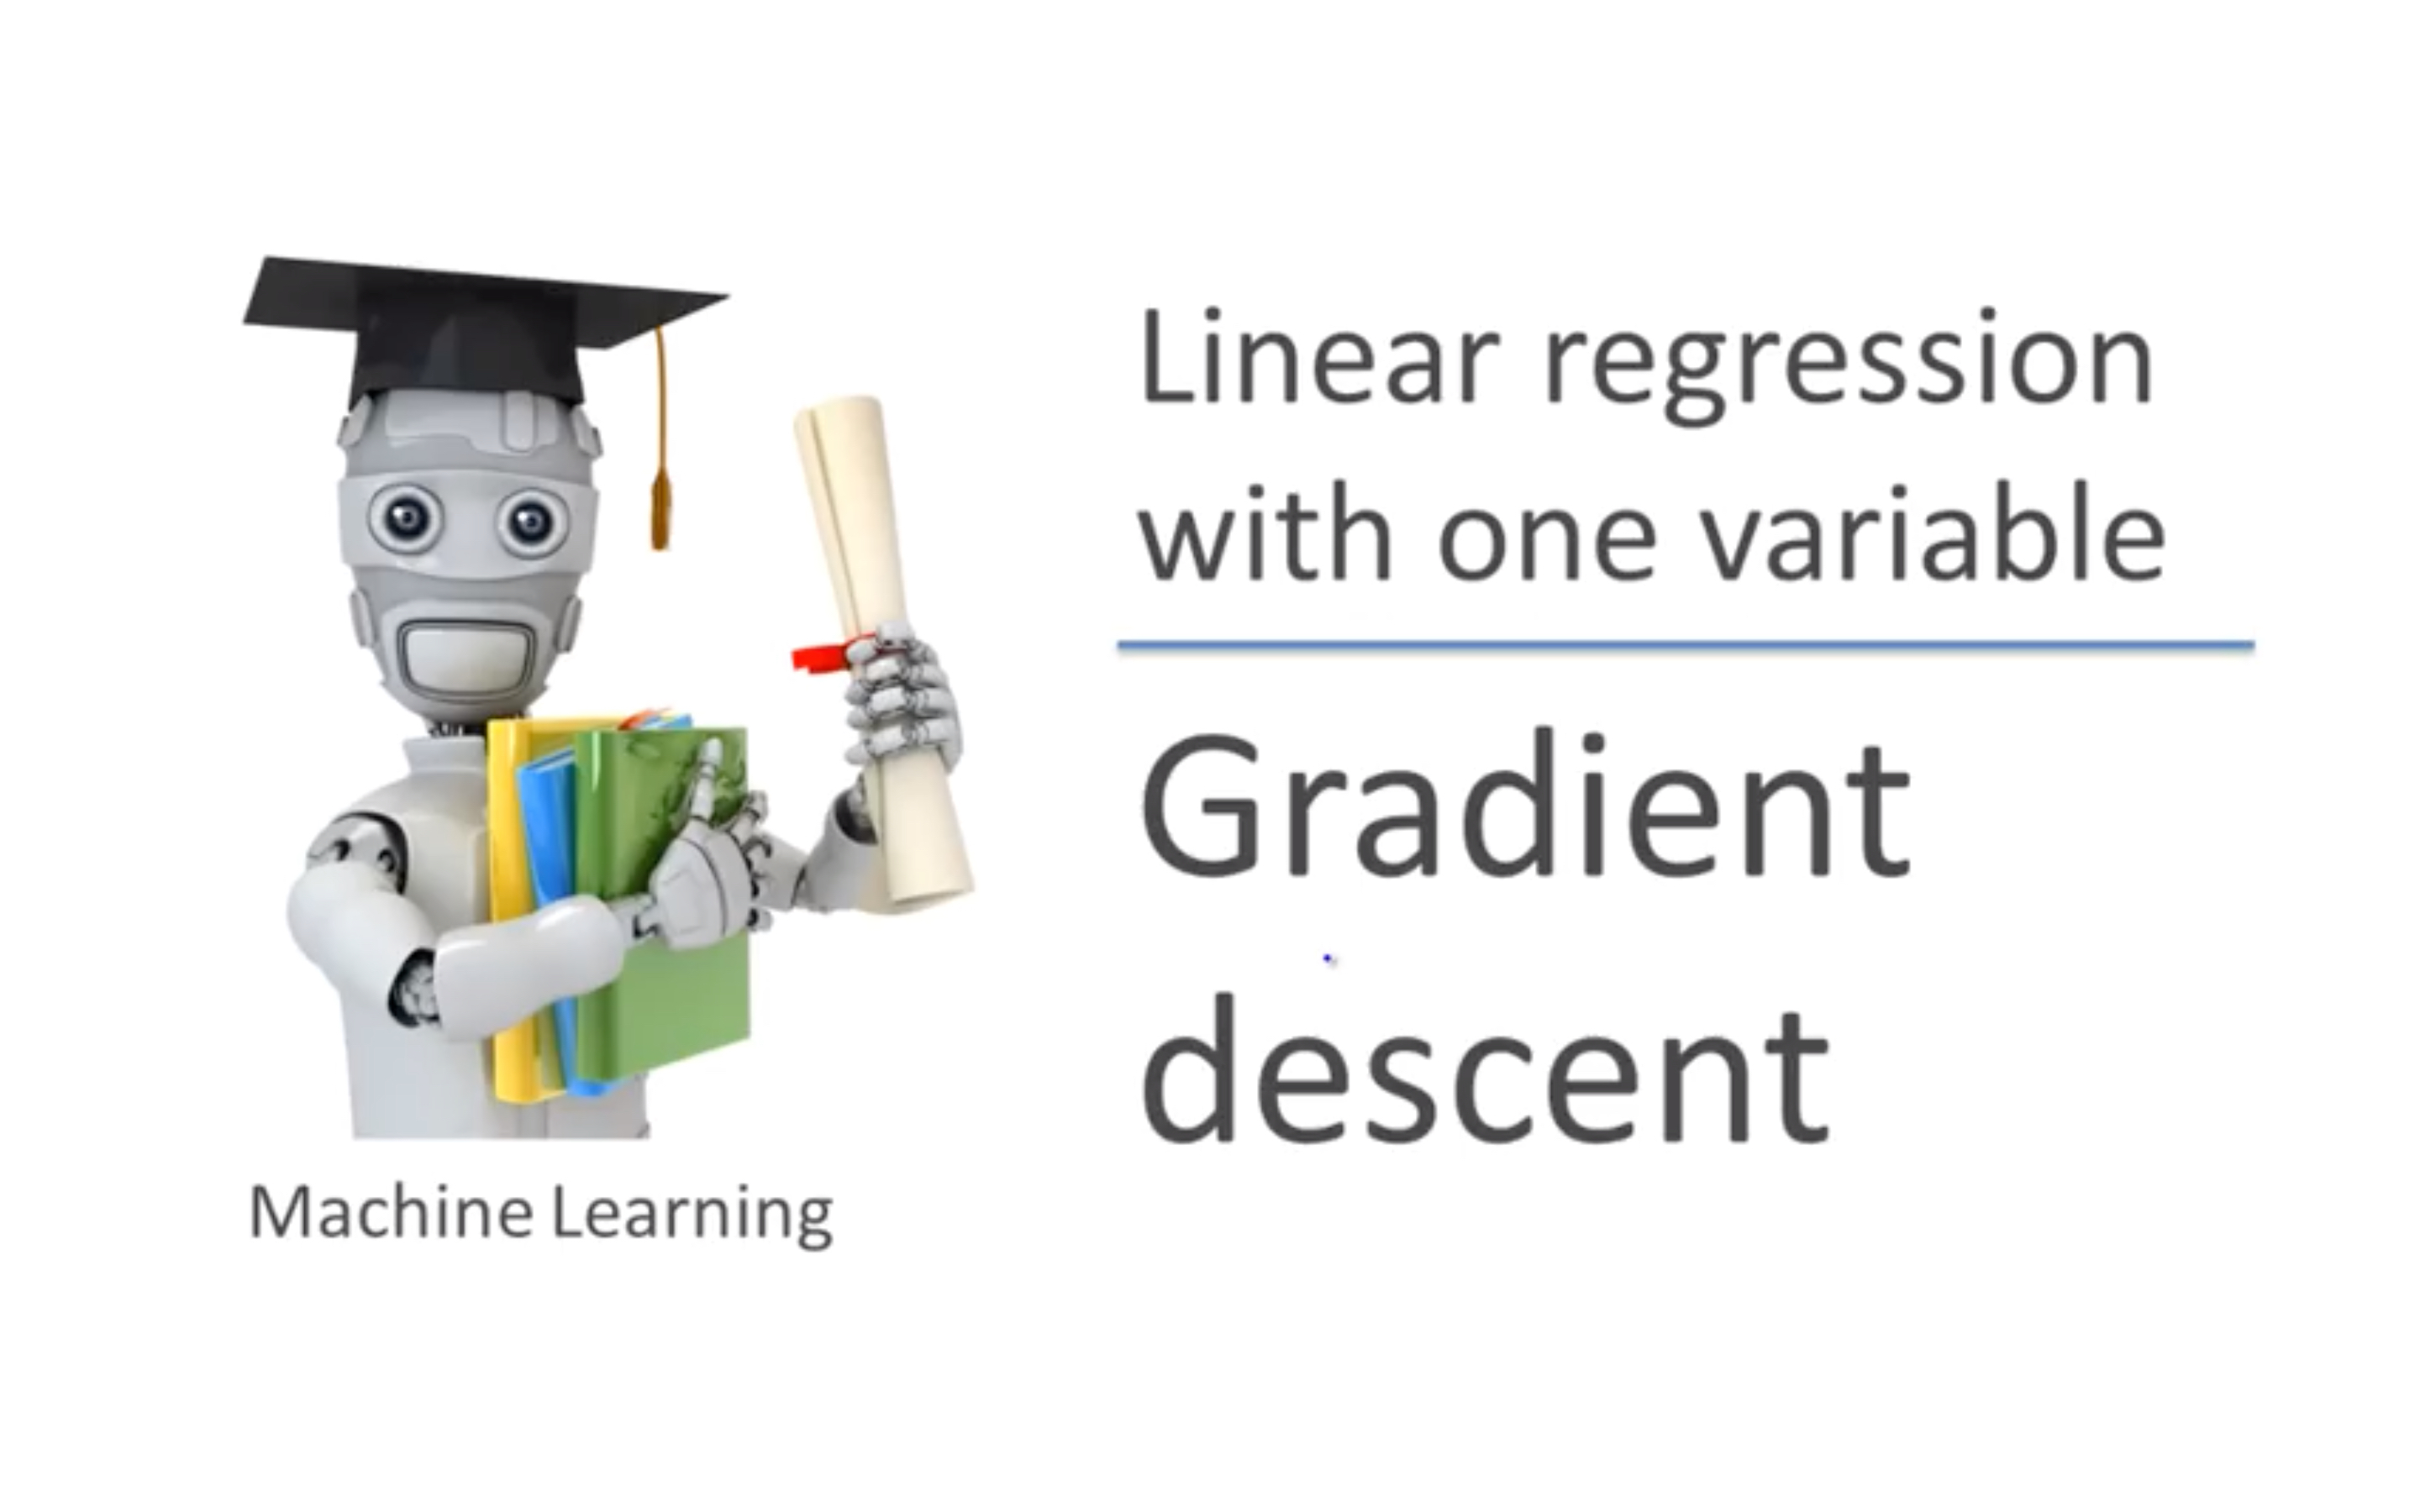

-   [Gradient Descent
    (Math)](https://youtu.be/sOou4izGINg?si=_Fz1V1tbGk8usJR0) <br/>
    (11:30 m)
-   [Intuition](https://youtu.be/DS83GeqWQqs?si=kOfDpHT_4t8hl_YL)
    <br/>(11:51 m)
-   [Linear
    Regression](https://www.youtube.com/watch?v=nOMy9LIcIkI&list=PLb0Gp98iu3OyY9zWJfSMq26nmkNKztNhA&index=6)
    <br/>(10:20 m)
-   [ML-005 \| Stanford \| Andrew
    Ng](https://www.youtube.com/playlist?list=PLoR5VjrKytrCv-Vxnhp5UyS1UjZsXP0Kj)<br/>
    (19 videos)

[Andrew Ng](https://www.andrewng.org) is presenting the gradient descent
algorithm using a linear regression with one variable.

Andrew Ng is Founder of [DeepLearning.AI](https://www.deeplearning.ai/),
Founder & CEO of [Landing AI](https://landing.ai/), General Partner at
[AI Fund](https://aifund.ai/), Chairman and Co-Founder of
[Coursera](https://www.coursera.org/) and an Adjunct Professor at
Stanford University’s Computer Science Department.

Ng was also a cofounder and head of [Google
Brain](https://en.wikipedia.org/wiki/Google_Brain "Google Brain") and
was the former Chief Scientist at
[Baidu](https://en.wikipedia.org/wiki/Baidu "Baidu").

# Mathematics

## 3Blue1Brown

-   [Essence of **linear
    algebra**](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
    -   A series of 16 videos (10 to 15 minutes per video) providing “a
        geometric understanding of matrices, determinants, eigen-stuffs
        and more.”
        -   6,662,732 views as of September 30, 2019.
-   [Essence of
    **calculus**](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)
    -   A series of 12 videos (15 to 20 minutes per video): “The goal
        here is to make calculus feel like something that you yourself
        could have discovered.”
        -   2,309,726 views as of September 30, 2019.

# Problem (take 2)

## Supervised Learning - Regression

-   The **training data** is a collection of **labelled** examples.
    -   $\{(x_i,y_i)\}_{i=1}^N$
        -   Each $x_i$ is a **feature vector** with $D$ dimensions.
        -   $x_i^{(j)}$ is the value of the **feature** $j$ of the
            example $i$,\\ for $j \in 1 \ldots D$ and
            $i \in 1 \ldots N$.
    -   The **label** $y_i$ is a **real number**.
-   **Problem**: Given the data set as input, create a **model** that
    can be used to predict the value of $y$ for an unseen $x$.

# Building blocks

## Building blocks

A typical **learning algorithm** comprises the following components:

1.  A **model**, often consisting of a set of **weights** whose values
    will be **“learnt”**.
2.  An **objective function**.
    -   In the case of **regression**, this is often a **loss
        function**, a function that quantifies misclassification. The
        **Root Mean Square Error** is a common loss function for
        regression problems.
        $\sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}$
3.  **Optimization** algorithm

## Optimization

**Until** some termination criteria is met$^1$:

-   **Evaluate** the loss function, comparing $h(x_i)$ to $y_i$.
-   **Make small changes to the weights**, in a way that reduces the
    value of the loss function.

1: E.g. the value of the **loss function no longer decreases** or the
**maximum number of iterations**.

## Derivative

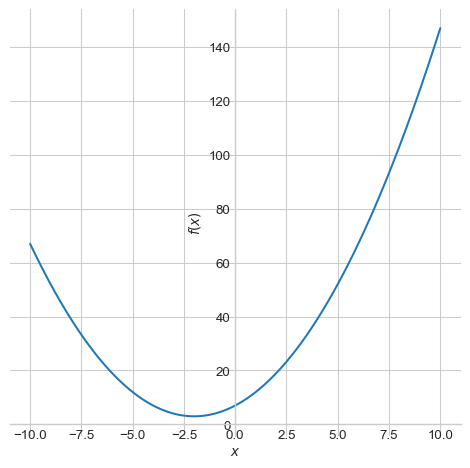

-   We will start with a **single-variable function**.
-   Think of this as our **loss function**, which we aim to minimize; to
    reduce the average discrepancy between expected and predicted
    values.

## Source code

In [15]:
from sympy import *

x = symbols('x')

f = x**2 + 4*x + 7

plot(f)

On the previous slide, I’ve used [**SymPy**](https://www.sympy.org/), a
library for **symbolic mathematics**.

## Derivative

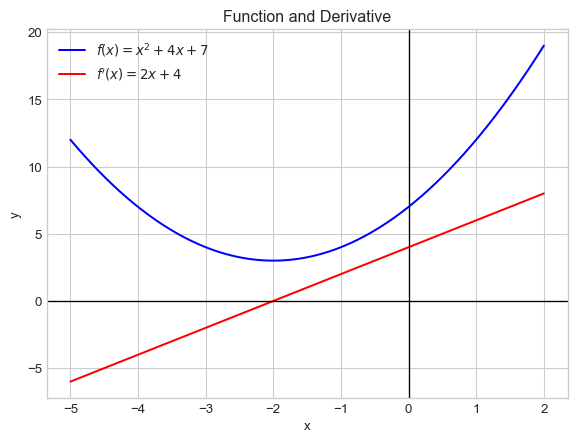

-   The graph of the **derivative**, $f^{'}(x)$, is depicted in **red**.

-   The **derivative** indicates how changes in the input affect the
    output, $f(x)$.

-   The magnitude of the **derivative** at $x = -2$ is $0$.

-   This point corresponds to the **minimum** of our function.

Near $x = -2$, variations in $x$ have minimal impact on the output
variable $y$.

## Derivative

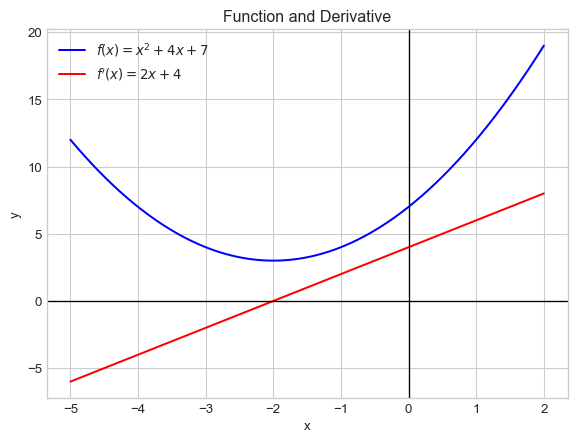

-   When evaluated at a **specific point**, the derivative indicates the
    **slope** of the **tangent line** to the graph of the function at
    that point.
-   At $x= -2$, the **slope** of the **tangent line** is 0.

## Derivative

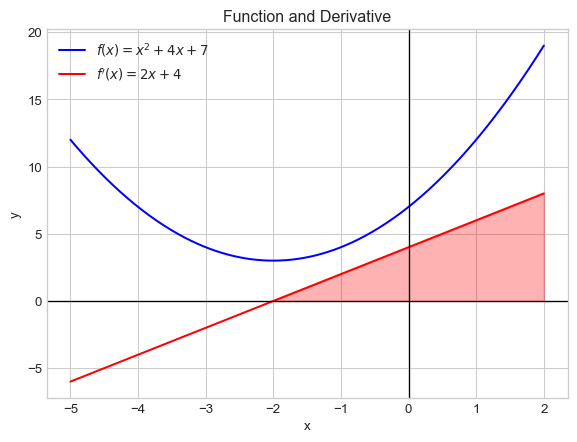

-   A **positive derivative** indicates that **increasing the input
    variable** will **increase the output value**.

-   Additionally, the **magnitude** of the derivative quantifies how
    **rapidly** the output changes.

## Derivative

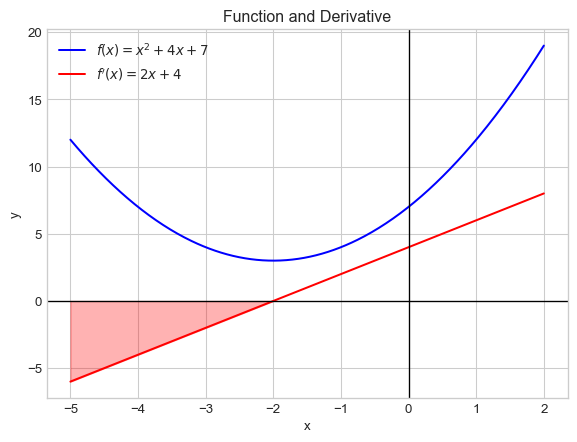

-   A **negative derivative** indicates that **increasing the input
    variable** will **decrease the output value**.

-   Additionally, the **magnitude** of the derivative quantifies how
    **rapidly** the output changes.

## Source code

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
x = sp.symbols('x')
f = x**2 + 4*x + 7

# Compute the derivative
f_prime = sp.diff(f, x)

# Lambdify the functions for numerical plotting
f_func = sp.lambdify(x, f, "numpy")
f_prime_func = sp.lambdify(x, f_prime, "numpy")

# Generate x values for plotting
x_vals = np.linspace(-5, 2, 400)

# Get y values for the function and its derivative
f_vals = f_func(x_vals)
f_prime_vals = f_prime_func(x_vals)

# Plot the function and its derivative
plt.plot(x_vals, f_vals, label=r'$f(x) = x^2 + 4x + 7$', color='blue')
plt.plot(x_vals, f_prime_vals, label=r"$f'(x) = 2x + 4$", color='red')

# Fill the area below the derivative where it's negative
plt.fill_between(x_vals, f_prime_vals, where=(f_prime_vals > 0), color='red', alpha=0.3)

# Add labels and legend
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Function and Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Recall

-   A **linear model** assumes that the value of the label, $\hat{y_i}$,
    can be expressed as a **linear combination** of the feature values,
    $x_i^{(j)}$: $$
    \hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$  
-   Here, $\theta_{j}$ is the $j$th parameter of the (linear) **model**,
    with $\theta_0$ being the **bias** term/parameter, and
    $\theta_1 \ldots \theta_D$ being the **feature weights**.

## Recall

-   The **Root Mean Square Error** (**RMSE**) is a common loss function
    for regression problems. $$
      \sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
    $$
-   In practice, minimizing the **Mean Squared Error** (**MSE**) is
    easier and gives the same result. $$
        \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2
    $$

## Gradient descent - single value

-   Our **model**: $$
    h(x_i) = \theta_0 + \theta_1 x_i^{(1)}
    $$
-   Our **loss function**: $$
    J(\theta_0, \theta_1) = \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2
    $$
-   **Problem**: find the values of $\theta_0$ and $\theta_1$ that
    minimize $J$.

## Gradient descent - single value

-   **Initialization:** $\theta_0$ and $\theta_1$ - either with random
    values or zeros.
-   **Loop:**
    -   repeat until convergence: $$
        \theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1) , \text{for } j=0 \text{ and } j=1
        $$
-   $\alpha$ is called the **learning rate** - this is the size of each
    step.
-   $\frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1)$ is the
    **partial derivative** with respect to $\theta_j$.

A **partial derivative** represents the rate of change of a
multivariable function **with respect to one of its variables**, while
**keeping the other variables constant**.

For the algorithm to be mathematically sound, all the $\theta_j$ must be
updated **simultaneously**.

## Partial derivatives

Given

$$
J(\theta_0, \theta_1) = \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2 = \frac{1}{N}\sum_1^N [\theta_0 + \theta_1 x_i - y_i]^2
$$

. . .

We have

$$
\frac {\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{2}{N} \sum\limits_{i=1}^{N} (\theta_0 - \theta_1 x_i - y_{i})
$$

. . .

and

$$
\frac {\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{2}{N} \sum\limits_{i=1}^{N} x_{i} \left(\theta_0 + \theta_1 x_i - y_{i}\right)
$$

## Partial derivate (SymPy)

In [21]:
from IPython.display import Math, display
from sympy import *

# Define the symbols

theta_0, theta_1, x_i, y_i = symbols('theta_0 theta_1 x_i y_i')

# Define the hypothesis function:

h = theta_0 + theta_1 * x_i

print("Hypothesis function:")

display(Math('h(x) = ' + latex(h)))

Hypothesis function:

## Partial derivate (SymPy)

In [22]:
N = Symbol('N', integer=True)

# Define the loss function (mean squared error)

J = (1/N) * Sum((h - y_i)**2, (x_i, 1, N))

print("Loss function:")

display(Math('J = ' + latex(J)))

Loss function:

## Partial derivate (SymPy)

In [23]:
# Calculate the partial derivative with respect to theta_0

partial_derivative_theta_0 = diff(J, theta_0)

print("Partial derivative with respect to theta_0:")

display(Math(latex(partial_derivative_theta_0)))

Partial derivative with respect to theta_0:

## Partial derivate (SymPy)

In [24]:
# Calculate the partial derivative with respect to theta_1

partial_derivative_theta_1 = diff(J, theta_1)

print("\nPartial derivative with respect to theta_1:")

display(Math(latex(partial_derivative_theta_1)))


Partial derivative with respect to theta_1:

## Multivariate linear regression

$$
h (x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \theta_3 x_i^{(3)} + \cdots + \theta_D x_i^{(D)}
$$

$$
\begin{align*}
  x_i^{(j)} &= \text{value of the feature } j \text{ in the } i \text{th example} \\ 
  D &= \text{the number of features}
\end{align*}
$$

## Gradient descent - multivariate

The new **loss function** is

$$
J(\theta_0, \theta_1,\ldots,\theta_D) =  \dfrac {1}{N} \displaystyle \sum _{i=1}^N \left (h(x_{i}) - y_i \right)^2
$$

Its **partial derivative**:

$$
\frac {\partial}{\partial \theta_j}J(\theta) = \frac{2}{N} \sum\limits_{i=1}^N x_i^{(j)} \left( \theta x_i - y_i \right)
$$

**where** $\theta$, $x_i$ and $y_i$ are vectors, and $\theta x_i$ is a
vector operation!

## Gradient vector

The vector containing the partial derivative of $J$ (with respect to
$\theta_j$, for $j \in \{0, 1\ldots D\}$) is called the **gradient
vector**.

$$
\nabla_\theta J(\theta) = \begin{pmatrix}
  \frac {\partial}{\partial \theta_0}J(\theta) \\
  \frac {\partial}{\partial \theta_1}J(\theta) \\
  \vdots  \\
  \frac {\partial}{\partial \theta_D}J(\theta)\\
\end{pmatrix}
$$

. . .

-   This vector gives the direction of the **steepest ascent**.
-   It gives its name to the **gradient descent** algorithm:

$$
\theta' = \theta - \alpha \nabla_\theta J(\theta)
$$

## Gradient descent - multivariate

The gradient descent algorithm becomes:

**Repeat until convergence:**

$$
\begin{aligned}
\{ & \\
\theta_j := & \theta_j -  \alpha  \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1, \ldots, \theta_D) \\ 
 &\text{for } j \in [0, \ldots, D] \textbf{ (update simultaneously)} \\
\} &
\end{aligned}
$$

## Gradient descent - multivariate

**Repeat until convergence:**

$$
\begin{aligned}
 \; \{ & \\
\; & \theta_0 := \theta_0 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N}  x^{0}_i(h(x_i) - y_i) \\
\; & \theta_1 := \theta_1 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N}  x^{1}_i(h(x_i) - y_i)  \\
\; & \theta_2 := \theta_2 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N}  x^{2}_i(h(x_i) - y_i) \\
   & \cdots \\ 
\} &
\end{aligned}
$$

## Assumptions

What were our **assumptions**?

. . .

-   The (objective/loss) function is **differentiable**.

## Local vs. global

-   A function is **convex** if for any pair of points on the graph of
    the function, the line connecting these two points lies above or on
    the graph.

    -   A **convex** function has a **single** minimum.
        -   The loss function for the linear regression (MSE) is convex.

-   For functions that are not convex, the gradient descent algorithm
    converges to a **local** minimum.

-   The loss function generally used with linear or logistic
    regressions, and Support Vector Machines (SVM) are convex, but not
    the ones for artificial neural networks.

A function would be convex downward or concave if those lines were below
or on the graph of the function.

## Local vs. global

![](https://upload.wikimedia.org/wikipedia/commons/1/1e/Extrema_example.svg)

**Attribution:**
[commons.wikimedia.org/wiki/File:Extrema_example.svg](https://commons.wikimedia.org/wiki/File:Extrema_example.svg)

## Learning rate

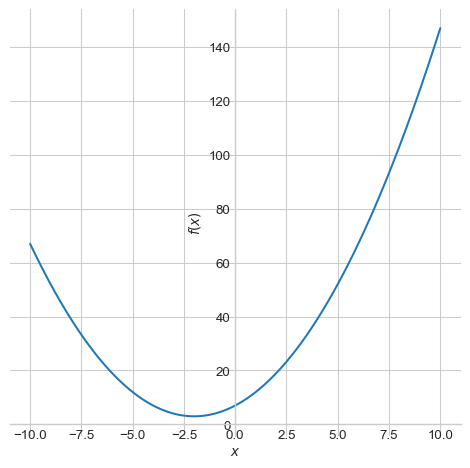

-   **Small steps**, low values for $\alpha$, will make the algorithm
    **converge slowly**.
-   **Large steps** might cause the algorithm to **diverge**.
-   Notice how the algorithm **slows down** naturally when approaching a
    minimum.

## Batch gradient descent

-   To be more precise, this algorithm is known as **batch gradient
    descent** since for each iteration, it processes the “whole batch”
    of training examples.

. . .

-   Literature suggests that the algorithm might take more time to
    converge if the features are on different scales.

## Batch gradient descent - drawback

-   The **batch gradient descent** algorithm becomes very **slow** as
    the **number of training examples increases**.

. . .

-   This is because **all** the training data is seen at **each
    iteration**. The algorithm is generally run for a fixed number of
    iterations, say 1000.

## Stochastic Gradient Descent

The **stochastic gradient descent** algorithm randomly selects **one**
training instance to calculate its gradient.

``` python
epochs = 10
for epoch in range(epochs):
   for i in range(N):
         selection = np.random.randint(N)
         # Calculate the gradient using selection
         # Update the weights
```

-   This allows it to work with large training sets.
-   Its trajectory is not as regular as the batch algorithm.
    -   Because of its bumpy trajectory, it is often better at finding
        the **global minima**, when compared to batch.
    -   Its bumpy trajectory makes it bounce around the local minima.

To mitigate the issue of oscillating around local minima, it is
advisable to progressively reduce the learning rate as the number of
epochs increases. This technique, known as a **learning schedule**,
helps achieve more stable convergence.

It important that the examples are either **selected randomly** or
**shuffled** before running the algorithm to make sure that the
algorithm converges towards the global minima.

## Mini-batch gradient descent

-   At each step, rather than selecting one training example as SGD
    does, **mini-batch gradient descent** randomly selects a **small
    number** of training examples to compute the gradients.
-   Its trajectory is more regular compared to SGD.
    -   As the size of the mini-batches increases, the algorithm becomes
        increasingly similar to batch gradient descent, which uses all
        the examples at each step.
-   It can take advantage of the hardware acceleration of matrix
    operations, particularly with GPUs.

## Summary

-   **Batch gradient descent** is inherently **slow** and impractical
    for large datasets requiring **out-of-core** support, though it is
    capable of handling a substantial number of features.

-   **Stochastic gradient descent** is **fast** and well-suited for
    processing a large volume of examples efficiently.

-   **Mini-batch gradient descent** combines the benefits of both batch
    and stochastic methods; it is **fast**, capable of managing large
    datasets, and leverages hardware acceleration, particularly with
    GPUs.

All three are implemented by `SGDRegressor` in `Scikit-Learn`.

## Optimization and deep nets

We will briefly revisit the subject when discussing **deep artificial
neural networks**, for which **specialized optimization algorithms**
exist.

-   Momentum Optimization
-   Nesterov Accelerated Gradient
-   AdaGrad
-   RMSProp
-   Adam and Nadam

## Final word

-   Optimization is a vast subject. Other algorithms exist and are used
    in other contexts.
    -   Including:
        -   Particle swarm optimization (PSO), genetic algorithms (GAs),
            and artificial bee colony (ABC) algorithms.

## Linear regression - summary

-   A **linear model** assumes that the value of the label, $\hat{y_i}$,
    can be expressed as a **linear combination** of the feature values,
    $x_i^{(j)}$:
    $\hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}$
-   The **Mean Squared Error (MSE)** is:
    $\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2$
-   **Batch**, **stochastic**, or **mini-batch gradient descent** can be
    used to find “optimal” values for the weights, $\theta_j$ for
    $j \in 0, 1, \ldots, D$.
-   The result is a **regressor**, a function that can be used to
    predict the $y$ value (the label) for some unseen example $x$.

# Prologue

## References

Géron, Aurélien. 2019. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 2nd ed. O’Reilly Media.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

Stanton, Jeffrey M. 2001. “Galton, Pearson, and the Peas: A Brief
History of Linear Regression for Statistics Instructors.” *Journal of
Statistics Education* 9 (3).
<https://doi.org/10.1080/10691898.2001.11910537>.

## Next lecture

-   Evaluating machine learning models

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa